# Exploration Products


In [38]:
import pickle
import pandas as pd

# Cargar archivo Pickle
with open('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/raw/products.pkl', 'rb') as file:
    products_data = pickle.load(file)

# Verificar el tipo de datos
print(type(products_data))

# Si es un DataFrame o similar, explorar su contenido
if isinstance(products_data, pd.DataFrame):
    print(products_data.info())  # Información general
    print(products_data.head())  # Primeras filas
elif isinstance(products_data, dict):
    print(len(products_data))  # Número de claves
    print(list(products_data.keys())[:5])  # Ejemplo de claves
elif isinstance(products_data, list):
    print(len(products_data))  # Número de elementos
    print(products_data[:5])  # Primeros elementos


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43692 entries, 0 to 43691
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   discount     43692 non-null  object 
 1   embedding    37522 non-null  object 
 2   partnumber   43692 non-null  int32  
 3   color_id     43692 non-null  int32  
 4   cod_section  43602 non-null  float64
 5   family       43692 non-null  int32  
dtypes: float64(1), int32(3), object(2)
memory usage: 1.5+ MB
None
  discount                                          embedding  partnumber  \
0        0  [-0.13401361, -0.1200429, -0.016117405, -0.167...       32776   
1        0  [-0.0949274, -0.107294075, -0.16559914, -0.174...       41431   
2        0  [-0.12904441, -0.07724628, -0.09799071, -0.164...       39419   
3        1  [-0.12783332, -0.133868, -0.10101265, -0.18888...       36087   
4        1  [-0.14092924, -0.1258284, -0.10809927, -0.1765...     

## **Análisis Inicial**
1. **Dimensiones:**
   - **Total de filas:** 43,692.
   - **Total de columnas:** 6.

2. **Columnas:**
   - `discount` (`object`): Indica si el producto tiene descuento (parece binario: 0/1).
   - `embedding` (`object`): Embedding de imagenes, pero hay valores nulos (37,522 valores presentes, 6,170 nulos).
   - `partnumber` (`int32`): Identificador único del producto.
   - `color_id` (`int32`): Identificador del color del producto.
   - `cod_section` (`float64`): Código de la sección, tiene algunos valores nulos (43,602 no nulos, 90 nulos).
   - `family` (`int32`): Familia del producto, parece estar completa.

3. **Uso de memoria:**
   - Dataset ocupa **1.5 MB**, lo cual es razonable, pero podemos optimizar aún más.

4. **Problemas detectados:**
   - `embedding` y `cod_section` tienen valores nulos que necesitan tratamiento.
   - `discount` debería ser convertido a un tipo más apropiado (`int` o `bool`).



---

## Limpieza y Transformación
1. Conversión de Tipos

    - discount: Convertir a int o bool para representar el valor binario.

    - embedding: Mantener como object (lista) pero revisar el manejo de nulos.

In [39]:
# Convertir discount a int
products_data['discount'] = products_data['discount'].astype('int8')

# Confirmar cambios
print(products_data.dtypes)


discount          int8
embedding       object
partnumber       int32
color_id         int32
cod_section    float64
family           int32
dtype: object


In [40]:
products_data.head()

,discount,embedding,partnumber,color_id,cod_section,family
0,0,"[-0.13401361, -0.1200429, -0.016117405, -0.167...",32776,85,4.0,73
1,0,"[-0.0949274, -0.107294075, -0.16559914, -0.174...",41431,135,4.0,73
2,0,"[-0.12904441, -0.07724628, -0.09799071, -0.164...",39419,339,4.0,73
3,1,"[-0.12783332, -0.133868, -0.10101265, -0.18888...",36087,135,4.0,73
4,1,"[-0.14092924, -0.1258284, -0.10809927, -0.1765...",34132,3,4.0,73




**2. Análisis de la columna `embedding`**
#### Objetivo:
- Identificar cuántos valores nulos existen y su proporción.
- Revisar algunos ejemplos de embeddings no nulos para entender su formato.
- Evaluar si los embeddings nulos pertenecen a un subconjunto específico de productos.



In [41]:
# Valores nulos en embedding
print(f"Valores nulos en embedding: {products_data['embedding'].isnull().sum()}")
print(f"Proporción de nulos en embedding: {products_data['embedding'].isnull().mean():.2%}")

# Ejemplo de embeddings no nulos
print("Ejemplo de embeddings no nulos:")
print(products_data.loc[products_data['embedding'].notnull(), 'embedding'].iloc[:5])

# Distribución de productos con embeddings nulos
print("Distribución de productos con embeddings nulos:")
print(products_data.loc[products_data['embedding'].isnull(), ['partnumber', 'family', 'color_id']].head())


Valores nulos en embedding: 6170
Proporción de nulos en embedding: 14.12%
Ejemplo de embeddings no nulos:
0    [-0.13401361, -0.1200429, -0.016117405, -0.167...
1    [-0.0949274, -0.107294075, -0.16559914, -0.174...
2    [-0.12904441, -0.07724628, -0.09799071, -0.164...
3    [-0.12783332, -0.133868, -0.10101265, -0.18888...
4    [-0.14092924, -0.1258284, -0.10809927, -0.1765...
Name: embedding, dtype: object
Distribución de productos con embeddings nulos:
    partnumber  family  color_id
27       38064      29       461
28       38989      14         3
43       41178      73       135
55       36307      74       312
75       33721      73       331


In [42]:
products_data.head()

,discount,embedding,partnumber,color_id,cod_section,family
0,0,"[-0.13401361, -0.1200429, -0.016117405, -0.167...",32776,85,4.0,73
1,0,"[-0.0949274, -0.107294075, -0.16559914, -0.174...",41431,135,4.0,73
2,0,"[-0.12904441, -0.07724628, -0.09799071, -0.164...",39419,339,4.0,73
3,1,"[-0.12783332, -0.133868, -0.10101265, -0.18888...",36087,135,4.0,73
4,1,"[-0.14092924, -0.1258284, -0.10809927, -0.1765...",34132,3,4.0,73


**3. Análisis de la columna `cod_section`**
#### Objetivo:
- Revisar la cantidad y proporción de valores nulos.
- Analizar la distribución de los valores presentes (`cod_section`) para decidir cómo manejar los nulos.
- Evaluar si hay una moda o si es mejor usar un valor predeterminado como `-1`.



In [43]:
# Valores nulos en cod_section
print(f"Valores nulos en cod_section: {products_data['cod_section'].isnull().sum()}")
print(f"Proporción de nulos en cod_section: {products_data['cod_section'].isnull().mean():.2%}")

# Estadísticas de cod_section
print("Estadísticas de cod_section (sin nulos):")
print(products_data['cod_section'].dropna().describe())

# Moda de cod_section
print(f"Moda de cod_section: {products_data['cod_section'].mode().iloc[0]}")


Valores nulos en cod_section: 90
Proporción de nulos en cod_section: 0.21%
Estadísticas de cod_section (sin nulos):
count    43602.000000
mean         2.209922
std          1.190734
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: cod_section, dtype: float64
Moda de cod_section: 1.0


In [44]:
products_data.head()

,discount,embedding,partnumber,color_id,cod_section,family
0,0,"[-0.13401361, -0.1200429, -0.016117405, -0.167...",32776,85,4.0,73
1,0,"[-0.0949274, -0.107294075, -0.16559914, -0.174...",41431,135,4.0,73
2,0,"[-0.12904441, -0.07724628, -0.09799071, -0.164...",39419,339,4.0,73
3,1,"[-0.12783332, -0.133868, -0.10101265, -0.18888...",36087,135,4.0,73
4,1,"[-0.14092924, -0.1258284, -0.10809927, -0.1765...",34132,3,4.0,73


Si los embeddings son esenciales para los modelos basados en contenido, podríamos rellenar los valores nulos con el vector promedio de los embeddings disponibles.

In [45]:
import numpy as np

# Calcular el vector promedio de los embeddings no nulos
embedding_avg = np.mean(
    np.stack(products_data.loc[products_data['embedding'].notnull(), 'embedding']),
    axis=0
)

# Rellenar valores nulos con el vector promedio
products_data['embedding'] = products_data['embedding'].apply(lambda x: embedding_avg if x is None else x)


In [46]:
products_data.head()

,discount,embedding,partnumber,color_id,cod_section,family
0,0,"[-0.13401361, -0.1200429, -0.016117405, -0.167...",32776,85,4.0,73
1,0,"[-0.0949274, -0.107294075, -0.16559914, -0.174...",41431,135,4.0,73
2,0,"[-0.12904441, -0.07724628, -0.09799071, -0.164...",39419,339,4.0,73
3,1,"[-0.12783332, -0.133868, -0.10101265, -0.18888...",36087,135,4.0,73
4,1,"[-0.14092924, -0.1258284, -0.10809927, -0.1765...",34132,3,4.0,73


Decisión: Rellenar los valores nulos con la moda (1.0), ya que es la categoría más frecuente y representativa.

In [47]:
# Rellenar valores nulos en cod_section con la moda
products_data['cod_section'] = products_data['cod_section'].fillna(1.0).astype('int16')


In [48]:
products_data.head()

,discount,embedding,partnumber,color_id,cod_section,family
0,0,"[-0.13401361, -0.1200429, -0.016117405, -0.167...",32776,85,4,73
1,0,"[-0.0949274, -0.107294075, -0.16559914, -0.174...",41431,135,4,73
2,0,"[-0.12904441, -0.07724628, -0.09799071, -0.164...",39419,339,4,73
3,1,"[-0.12783332, -0.133868, -0.10101265, -0.18888...",36087,135,4,73
4,1,"[-0.14092924, -0.1258284, -0.10809927, -0.1765...",34132,3,4,73


**3. Verificación de Cambios**

In [49]:
# Verificar si hay valores nulos restantes
print(f"Valores nulos en embedding: {products_data['embedding'].isnull().sum()}")
print(f"Valores nulos en cod_section: {products_data['cod_section'].isnull().sum()}")

# Revisar un ejemplo de los embeddings rellenados
print("Ejemplo de embeddings después del relleno:")
print(products_data['embedding'].iloc[:5])

# Confirmar la distribución de cod_section
print("Distribución de cod_section:")
print(products_data['cod_section'].value_counts())


Valores nulos en embedding: 0
Valores nulos en cod_section: 0
Ejemplo de embeddings después del relleno:
0    [-0.13401361, -0.1200429, -0.016117405, -0.167...
1    [-0.0949274, -0.107294075, -0.16559914, -0.174...
2    [-0.12904441, -0.07724628, -0.09799071, -0.164...
3    [-0.12783332, -0.133868, -0.10101265, -0.18888...
4    [-0.14092924, -0.1258284, -0.10809927, -0.1765...
Name: embedding, dtype: object
Distribución de cod_section:
cod_section
1    18415
3     9540
4     8969
2     6768
Name: count, dtype: int64


In [50]:
products_data.head()

,discount,embedding,partnumber,color_id,cod_section,family
0,0,"[-0.13401361, -0.1200429, -0.016117405, -0.167...",32776,85,4,73
1,0,"[-0.0949274, -0.107294075, -0.16559914, -0.174...",41431,135,4,73
2,0,"[-0.12904441, -0.07724628, -0.09799071, -0.164...",39419,339,4,73
3,1,"[-0.12783332, -0.133868, -0.10101265, -0.18888...",36087,135,4,73
4,1,"[-0.14092924, -0.1258284, -0.10809927, -0.1765...",34132,3,4,73


Optimización de Tipos

In [51]:
# Optimización de tipos
products_data['partnumber'] = products_data['partnumber'].astype('int32')
products_data['color_id'] = products_data['color_id'].astype('int32')
products_data['family'] = products_data['family'].astype('int32')

# Confirmar uso de memoria optimizado
print("Memoria optimizada: {:.2f} MB".format(products_data.memory_usage(deep=True).sum() / (1024 * 1024)))


Memoria optimizada: 35.75 MB


In [52]:
products_data.head()

,discount,embedding,partnumber,color_id,cod_section,family
0,0,"[-0.13401361, -0.1200429, -0.016117405, -0.167...",32776,85,4,73
1,0,"[-0.0949274, -0.107294075, -0.16559914, -0.174...",41431,135,4,73
2,0,"[-0.12904441, -0.07724628, -0.09799071, -0.164...",39419,339,4,73
3,1,"[-0.12783332, -0.133868, -0.10101265, -0.18888...",36087,135,4,73
4,1,"[-0.14092924, -0.1258284, -0.10809927, -0.1765...",34132,3,4,73


4. Guardado del dataset optimizado.

In [53]:
# Guardar en formato Pickle
products_data.to_pickle('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/new_processed/products_data.pkl')


---

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta del archivo
file_path = "/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/new_processed/products_data_enriched.pkl"

# Cargar el dataset de productos
products_df = pd.read_pickle(file_path)

# Verificar las primeras filas del dataset
print("Primeras filas del dataset de productos:")
print(products_df.head())

# Información general del dataset
print("\nInformación del dataset de productos:")
print(products_df.info())

Primeras filas del dataset de productos:
   discount                                          embedding  partnumber  \
0         0  [-0.13401361, -0.1200429, -0.016117405, -0.167...       32776   
1         0  [-0.0949274, -0.107294075, -0.16559914, -0.174...       41431   
2         0  [-0.12904441, -0.07724628, -0.09799071, -0.164...       39419   
3         1  [-0.12783332, -0.133868, -0.10101265, -0.18888...       36087   
4         1  [-0.14092924, -0.1258284, -0.10809927, -0.1765...       34132   

   color_id  cod_section  family  popularity  \
0        85            4      73           8   
1       135            4      73           7   
2       339            4      73          13   
3       135            4      73           8   
4         3            4      73           6   

                                   reduced_embedding  cluster  \
0  [1.2057264, 4.4139466, 0.20042135, -1.7360271,...       17   
1  [0.7336314, 5.2660546, 0.45971245, -2.7015095,...       17   
2  [1.


Distribución de productos con y sin descuento:
discount
0    42314
1     1378
Name: count, dtype: int64


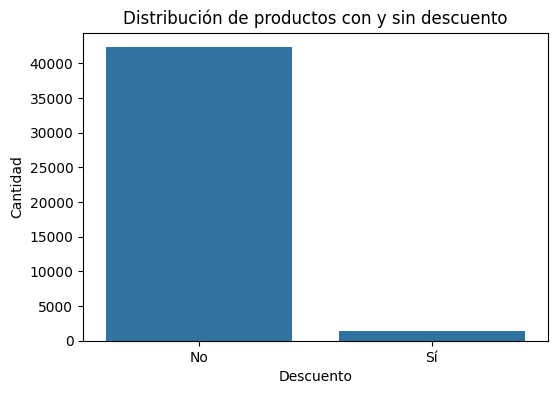


Ejemplo de embeddings de productos:
0    [-0.13401361, -0.1200429, -0.016117405, -0.167...
1    [-0.0949274, -0.107294075, -0.16559914, -0.174...
2    [-0.12904441, -0.07724628, -0.09799071, -0.164...
3    [-0.12783332, -0.133868, -0.10101265, -0.18888...
4    [-0.14092924, -0.1258284, -0.10809927, -0.1765...
Name: embedding, dtype: object
Dimensiones únicas de embeddings: [0]

Distribución de colores:
color_id
3      5725
64     3271
83     2711
397    1463
85     1371
Name: count, dtype: int64


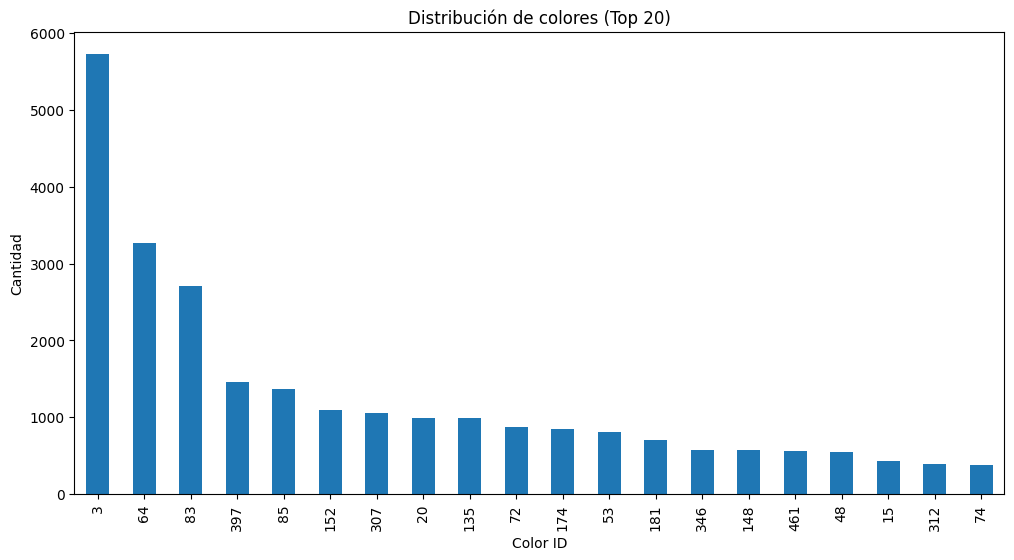


Distribución de familias:
family
73     4817
156    3572
51     3479
53     2559
15     1558
Name: count, dtype: int64


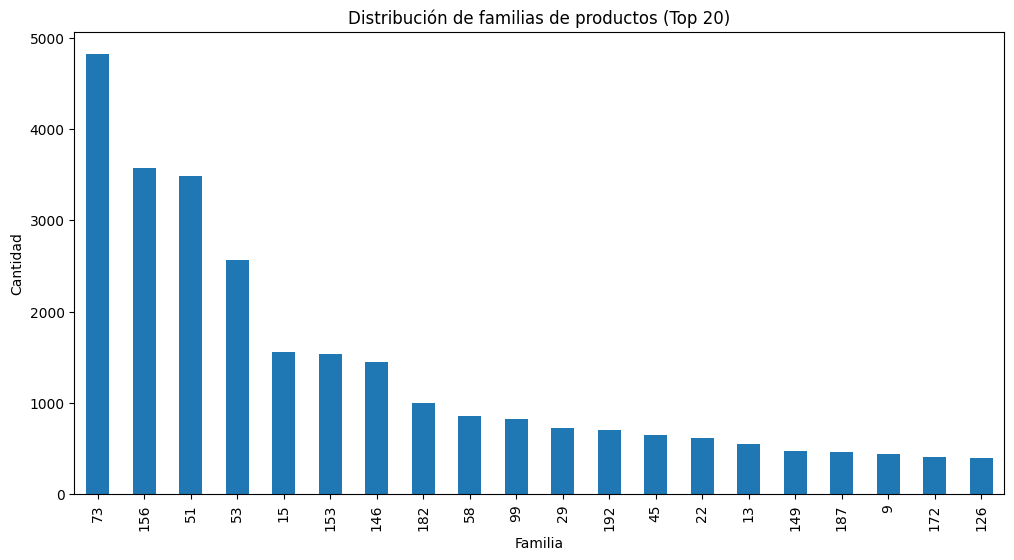


Distribución por sección:
cod_section
1    18415
3     9540
4     8969
2     6768
Name: count, dtype: int64


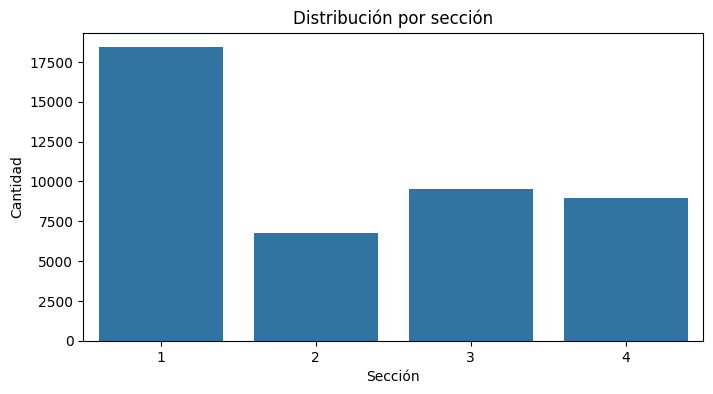

In [55]:
# Distribución de productos con descuento
if 'discount' in products_df.columns:
    discount_counts = products_df['discount'].value_counts()
    print("\nDistribución de productos con y sin descuento:")
    print(discount_counts)
    plt.figure(figsize=(6, 4))
    sns.barplot(x=discount_counts.index, y=discount_counts.values)
    plt.title("Distribución de productos con y sin descuento")
    plt.xlabel("Descuento")
    plt.ylabel("Cantidad")
    plt.xticks([0, 1], ["No", "Sí"])
    plt.show()

# Análisis de embeddings de productos
if 'embedding' in products_df.columns:
    print("\nEjemplo de embeddings de productos:")
    print(products_df['embedding'].head())
    # Dimensionalidad de embeddings
    embedding_dims = products_df['embedding'].apply(lambda x: len(x) if isinstance(x, list) else 0).unique()
    print("Dimensiones únicas de embeddings:", embedding_dims)

# Distribución de colores
if 'color_id' in products_df.columns:
    color_counts = products_df['color_id'].value_counts()
    print("\nDistribución de colores:")
    print(color_counts.head())
    plt.figure(figsize=(12, 6))
    color_counts[:20].plot(kind='bar')
    plt.title("Distribución de colores (Top 20)")
    plt.xlabel("Color ID")
    plt.ylabel("Cantidad")
    plt.show()

# Distribución de familias
if 'family' in products_df.columns:
    family_counts = products_df['family'].value_counts()
    print("\nDistribución de familias:")
    print(family_counts.head())
    plt.figure(figsize=(12, 6))
    family_counts[:20].plot(kind='bar')
    plt.title("Distribución de familias de productos (Top 20)")
    plt.xlabel("Familia")
    plt.ylabel("Cantidad")
    plt.show()

# Distribución por sección
if 'cod_section' in products_df.columns:
    section_counts = products_df['cod_section'].value_counts()
    print("\nDistribución por sección:")
    print(section_counts.head())
    plt.figure(figsize=(8, 4))
    sns.barplot(x=section_counts.index, y=section_counts.values)
    plt.title("Distribución por sección")
    plt.xlabel("Sección")
    plt.ylabel("Cantidad")
    plt.show()

# Correlaciones entre variables numéricas
numerical_columns = products_df.select_dtypes(include=['float64', 'int64']).columns
if not numerical_columns.empty:
    print("\nCorrelaciones entre variables numéricas:")
    corr_matrix = products_df[numerical_columns].corr()
    print(corr_matrix)
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Mapa de calor de correlaciones")
    plt.show()


In [ ]:
# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(products_df.describe(include='all'))


Estadísticas descriptivas:
